In [17]:
%load_ext autoreload
%autoreload 2

from geomoka.dataloader.dataset import GenericDataset
from tqdm import tqdm
from util.draw import DrawSegmentation

# WARNING: remove ../ from the paths in config, as the code is run from the root directory of the project
root_dir = '../dataset/isprs_postdam'
test_csv = '../dataset/isprs_postdam/splits/test.csv'
metadata = '../config/isprs_postdam/metadata.yaml'

test_ds = GenericDataset(
    data_csv=test_csv,
    root_dir=root_dir,
    metadata=metadata,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%load_ext autoreload
from geomoka.model.wrapper import SegmentationModel

model_pth = "../outputs/dpt_dinov2_base_isprs_postdam_d3f1710b/best_model.pth"
model = SegmentationModel.load(model_pth)
model.confidence_threshold = 0.4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Pretrained DINOv2 dinov2_base weights already exists at /home/ubuntu/.cache/geomoka/pretrained/dinov2_base.pth. Skipping download.
Pretrained DINOv2 weights loaded from /home/ubuntu/.cache/geomoka/pretrained/dinov2_base.pth
Built dpt_dinov2_base model with 3 input channels and 5 classes with lock_backbone=False
[Inference] Model loaded on cuda
[Inference] Num classes: 5
[Model] Confidence threshold set to 0.4


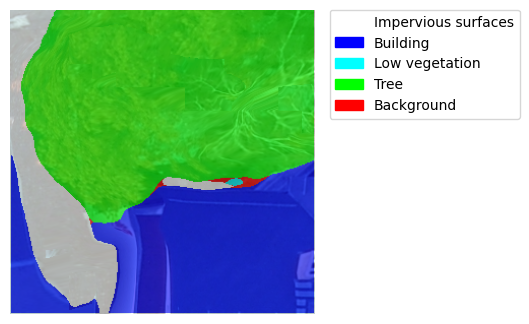

In [36]:
from util.draw import DrawSegmentation

img, mask = test_ds[0]
pred = model.predict(img)
draw = DrawSegmentation(metadata)
draw(img, mask=pred[0], alpha=0.6)

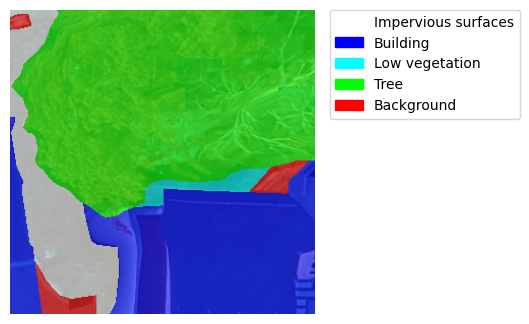

In [37]:
draw(img, mask=mask, alpha=0.6)